# Exercício PCA - Identificação de Faces com base de dados Olivetti

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Carregar os Dados

In [112]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces(shuffle=True, random_state=42)

In [113]:
print(f"Formato de faces.data (imagens achatadas): {faces.data.shape}")
print(f"Formato de faces.images (imagens originais): {faces.images.shape}")
print(f"Formato de faces.target (rótulos): {faces.target.shape}")
print(f"Número de classes (pessoas diferentes): {len(np.unique(faces.target))}")
# Imprime os primeiros 500 caracteres da descrição
print(f"\nDescrição do dataset (trecho):\n{faces.DESCR[:905]}...") 

Formato de faces.data (imagens achatadas): (400, 4096)
Formato de faces.images (imagens originais): (400, 64, 64)
Formato de faces.target (rótulos): (400,)
Número de classes (pessoas diferentes): 40

Descrição do dataset (trecho):
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken a

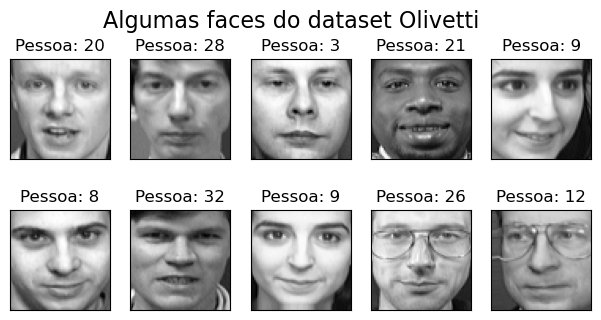

In [114]:
# Exemplo de como visualizar algumas das faces
n_rows = 2
n_cols = 5
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.8))
plt.suptitle("Algumas faces do dataset Olivetti", fontsize=16)

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.title(f"Pessoa: {faces.target[i]}")
    plt.xticks(())
    plt.yticks(())

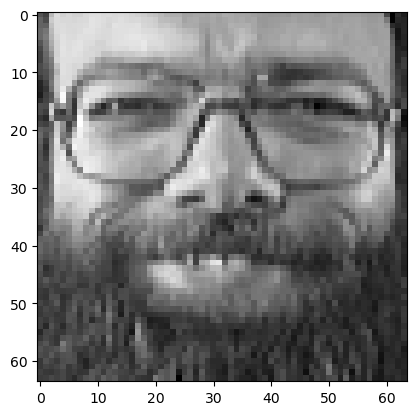

In [115]:
plt.imshow(faces.images[11], cmap=plt.cm.gray)

# Redução de Dimensionalidade com PCA

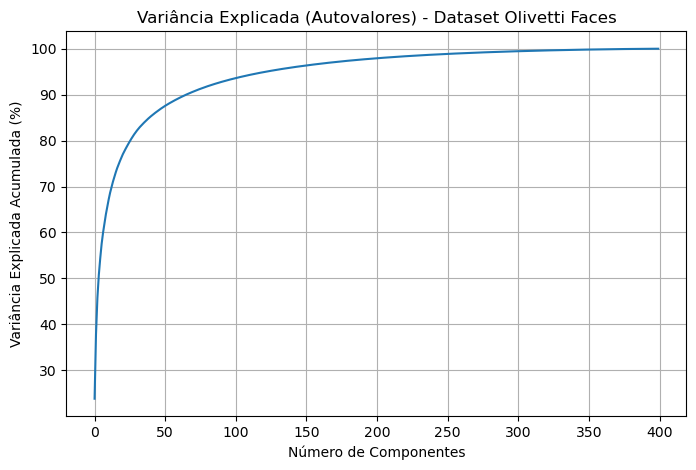

In [116]:
pca = PCA()
pca.fit(faces.data)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada (%)')
plt.title('Variância Explicada (Autovalores) - Dataset Olivetti Faces')
plt.grid(True)

In [117]:
pca = PCA(n_components=50)
pca.fit(faces.data) # faces.data já está achatada, não é necessário fazer reshape
faces_reduced = pca.transform(faces.data)
print(f"\nFormato de faces_reduced (após PCA): {faces_reduced.shape}")
print(f"Variância Explicada pelos componentes: {sum(pca.explained_variance_ratio_):.2f}")


Formato de faces_reduced (após PCA): (400, 50)
Variância Explicada pelos componentes: 0.87


## Visualização em Duas Dimensões (Dois Principais Componentes)

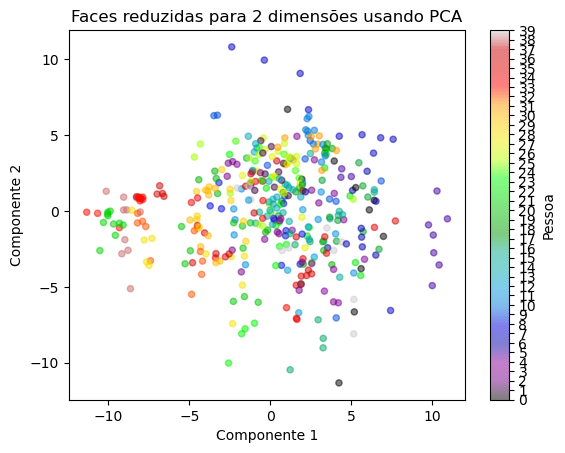

In [118]:
scatter = plt.scatter(faces_reduced[:, 0], faces_reduced[:, 1], 
                      c=faces.target, cmap='nipy_spectral', s=20, alpha=0.5)
plt.title("Faces reduzidas para 2 dimensões usando PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(scatter, ticks=range(len(np.unique(faces.target))), label='Pessoa')

# Experimento com Classificador

Para o classificador Bayesiano, a pessoa 0 será a classe para o qual ele será treinado.

## Preparando os Dados

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

y_binario = (faces.target == 0).astype(int)

test_list = [0.5, 0.4, 0.3, 0.2, 0.1]
for test_size in test_list:
    X_train, X_test, y_train, y_test = train_test_split(faces_reduced, y_binario, 
                                                        test_size=test_size, random_state=42)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia com test_size = {test_size}: {accuracy:.3f}")

Acurácia com test_size = 0.5: 0.960
Acurácia com test_size = 0.4: 0.963
Acurácia com test_size = 0.3: 0.983
Acurácia com test_size = 0.2: 0.975
Acurácia com test_size = 0.1: 0.950


Assim vemos que a divisão ideal dos conjuntos de treino e teste é 70%-30%. 

## Classificação com Naive Bayes

In [120]:
acuracias = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(faces_reduced, y_binario, 
                                                        test_size=0.3, random_state=i)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    acuracias.append(accuracy_score(y_test, y_pred))

media = np.mean(acuracias)
desvio = np.std(acuracias)

print("Acurácias:", acuracias)
print(f"Média: {media:.4f}, Desvio padrão: {desvio:.4f}")

Acurácias: [0.9833333333333333, 1.0, 0.9666666666666667, 0.9833333333333333, 0.9583333333333334, 0.95, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.95]
Média: 0.9742, Desvio padrão: 0.0160


| Execução | Acurácia (%) |
|----------|--------------|
| 1        | 98.33        |
| 2        | 100.00       |
| 3        | 96.67        |
| 4        | 98.33        |
| 5        | 95.83        |
| 6        | 95.00        |
| 7        | 98.33        |
| 8        | 98.33        |
| 9        | 98.33        |
| 10       | 95.00        |
| **Média**| **97.42**    |
| **Desvio padrão**| **1.60**|


A redução de dimensionalidade com PCA foi feita com 50 componentes (autovetores) pois, como é possível ver no gráfico de variância explicada por quantidade de componentes não há muito ganho ao aumentar o número de componentes além de 50, sendo esta uma quantidade que consegue descrever muito bem o dataset (87% de variância explicada).